In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
limit_rows   = 7000000
df           = pd.read_csv("../kaggle/data/train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)
unique_ids   = pd.Series(df["ncodpers"].unique())
limit_people = 1e4
unique_id    = unique_ids.sample(n=limit_people)
df           = df[df.ncodpers.isin(unique_id)]
df.describe()

/Users/talb/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/talb/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:2572: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  locs = rs.choice(axis_length, size=n, replace=replace, p=weights)
/Users/talb/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ncodpers,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,7.789400e+04,77545.000000,77545.0,77110.000000,77545.000000,6.388700e+04,77894.0,77894.000000,77894.000000,77894.000000,...,77894.000000,77894.000000,77894.000000,77894.000000,77894.000000,77894.000000,77894.000000,77699.000000,77699.000000,77894.000000
mean,7.995673e+05,1.163028,1.0,26.687641,0.486569,1.330683e+05,0.0,0.000077,0.703546,0.000385,...,0.007459,0.012697,0.003569,0.055665,0.048155,0.028654,0.004365,0.063463,0.068482,0.136776
std,4.222684e+05,3.993791,0.0,12.659667,0.499823,1.610834e+05,0.0,0.008776,0.456697,0.019621,...,0.086043,0.111963,0.059634,0.229276,0.214095,0.166834,0.065924,0.243795,0.252573,0.343613
min,1.609900e+04,1.000000,1.0,1.000000,0.000000,2.539800e+03,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.111030e+05,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,9.109530e+05,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
75%,1.161612e+06,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
max,1.495432e+06,99.000000,1.0,52.000000,1.000000,8.554229e+06,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
25,2015-01-28,1050592,N,ES,H,22,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
37,2015-01-28,1050628,N,ES,V,22,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
43,2015-01-28,1050680,N,ES,V,53,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
53,2015-01-28,1050710,N,ES,H,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
79,2015-01-28,1050509,N,ES,H,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
df["fecha_dato"] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")
df["fecha_dato"].unique()

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [5]:
df["month"] = pd.DatetimeIndex(df["fecha_dato"]).month
df["age"]   = pd.to_numeric(df["age"], errors="coerce")

In [6]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                       True
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

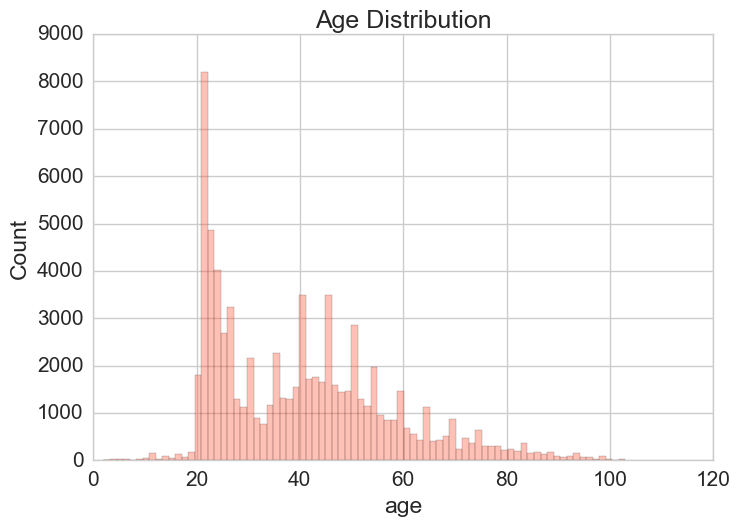

In [7]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

In [9]:
df.loc[df.age < 18,"age"] 

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month
11192,2015-01-28,1064242,N,ES,H,12.0,2012-09-20,0,34,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
25811,2015-01-28,1014202,N,ES,H,8.0,2012-04-30,0,39,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
28778,2015-01-28,1020552,N,ES,H,11.0,2012-06-22,0,37,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
50240,2015-01-28,1121168,N,ES,H,12.0,2013-02-11,0,29,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
51528,2015-01-28,1131604,N,ES,H,6.0,2013-04-24,0,27,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
56494,2015-01-28,1118334,N,ES,H,4.0,2013-01-16,0,30,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
69008,2015-01-28,1091006,N,ES,V,10.0,2012-10-29,0,33,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
96953,2015-01-28,944218,N,ES,H,6.0,2011-09-16,0,46,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
98485,2015-01-28,895577,N,ES,H,12.0,2010-11-02,0,56,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
106423,2015-01-28,882154,N,ES,V,10.0,2010-06-10,0,61,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
